Chapter 09

# 朝不同正交坐标系投影
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码展示了二维向量 $$x = \begin{bmatrix} 4 \\ 3 \end{bmatrix}$$在不同方向上的投影，生成了9个子图展示每个角度的投影效果。首先定义角度列表 `thetas`，包括从0到135度的多个角度。对于每个角度 $\theta$，计算两个单位向量 $v_1$ 和 $v_2$：

$$
v_1(\theta) = \begin{bmatrix} \cos(\theta) \\ \sin(\theta) \end{bmatrix}
$$

和与 $v_1$垂直的单位向量

$$
v_2(\theta) = \begin{bmatrix} -\sin(\theta) \\ \cos(\theta) \end{bmatrix}
$$

代码分别计算向量$x$在 $v_1$ 和 $v_2$ 方向上的投影，得到投影长度为

$$
\text{proj}_{v_1} = v_1^T \cdot x
$$

和

$$
\text{proj}_{v_2} = v_2^T \cdot x
$$

在每个子图中，代码绘制 $x$ 在 $v_1$ 和 $v_2$ 上的投影线段及投影点，并显示向量 $v_1$ 和 $v_2$ 的方向，同时将向量 $x$ 和坐标轴也一并展示。通过不同角度的展示，可以直观地观察到 $x$ 在各个方向的投影变化及几何关系。

In [1]:
import numpy as np  # 导入数值计算库
import matplotlib.pyplot as plt  # 导入绘图库

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度

In [3]:
# 定义角度数组
thetas = np.array([0, 15, 30, 45, 60, 75, 90, 120, 135])  # 定义角度列表

In [4]:
# 定义向量 x
x = np.array([[4], [3]])  # 定义二维向量 x

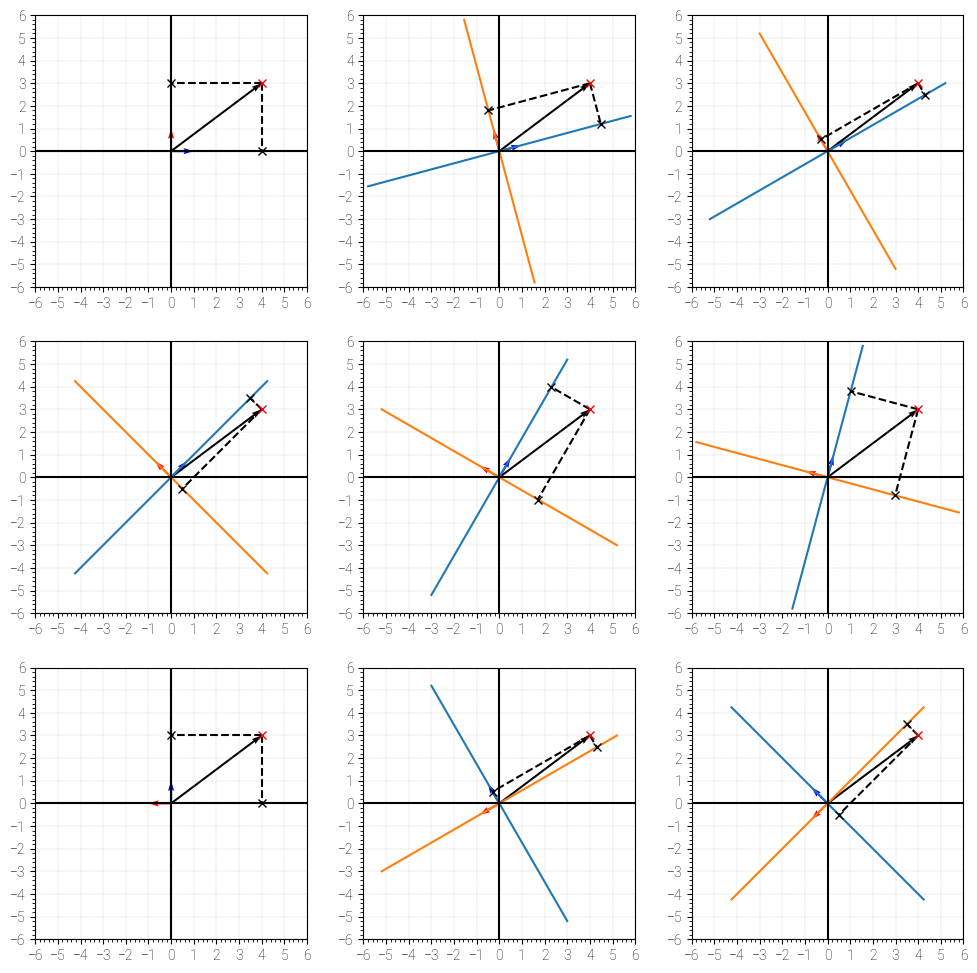

In [6]:
# 创建绘图
i = 1  # 子图计数器
fig = plt.figure(figsize = (12,12))  # 创建绘图

# 计算不同角度下的投影
for theta in thetas:  # 遍历角度列表
    
    theta = theta / 180 * np.pi  # 将角度转换为弧度
    ax = fig.add_subplot(3, 3, i)  # 添加3x3子图布局中的第 i 个子图

    # 定义 v1 向量并计算 x 在 v1 上的投影
    v1 = np.array([[np.cos(theta)], [np.sin(theta)]])  # 计算旋转角度方向的单位向量 v1
    proj = v1.T @ x  # 计算向量 x 在 v1 上的投影
    # print(proj)  # 输出投影长度
    plt.plot([-v1[0, 0]*6, v1[0, 0]*6], [-v1[1, 0]*6, v1[1, 0]*6])  # 绘制 v1 的投影轴
    plt.plot([x[0, 0], v1[0, 0]*proj[0, 0]], [x[1, 0], v1[1, 0]*proj[0, 0]], color='k', linestyle='--')  # 绘制 x 到投影点的虚线
    plt.plot(v1[0, 0]*proj[0, 0], v1[1, 0]*proj[0, 0], color='k', marker='x')  # 标记投影点

    plt.quiver(0, 0, v1[0, 0], v1[1, 0], angles='xy', scale_units='xy', scale=1, color='b')  # 绘制单位向量 v1

    # 定义 v2 向量并计算 x 在 v2 上的投影
    v2 = np.array([[-np.sin(theta)], [np.cos(theta)]])  # 计算与 v1 垂直的单位向量 v2
    proj = v2.T @ x  # 计算向量 x 在 v2 上的投影
    # print(proj)  # 输出投影长度
    plt.plot([-v2[0, 0]*6, v2[0, 0]*6], [-v2[1, 0]*6, v2[1, 0]*6])  # 绘制 v2 的投影轴
    plt.plot([x[0, 0], v2[0, 0]*proj[0, 0]], [x[1, 0], v2[1, 0]*proj[0, 0]], color='k', linestyle='--')  # 绘制 x 到投影点的虚线
    plt.plot(v2[0, 0]*proj[0, 0], v2[1, 0]*proj[0, 0], color='k', marker='x')  # 标记投影点

    plt.quiver(0, 0, v2[0, 0], v2[1, 0], angles='xy', scale_units='xy', scale=1, color='r')  # 绘制单位向量 v2

    # 绘制坐标轴和向量 x
    plt.axhline(y=0, color='k')  # 绘制 x 轴
    plt.axvline(x=0, color='k')  # 绘制 y 轴
    plt.plot(x[0, 0], x[1, 0], marker='x', color='r')  # 标记向量 x 的起点
    plt.quiver(0, 0, x[0, 0], x[1, 0], angles='xy', scale_units='xy', scale=1, color='k')  # 绘制向量 x

    # 设置坐标轴和网格
    plt.axis('scaled')  # 使坐标轴比例相等
    ax.grid(linestyle='--', linewidth=0.25, color=[0.75, 0.75, 0.75])  # 设置网格样式
    plt.xlim([-6, 6])  # 设置 x 轴范围
    plt.ylim([-6, 6])  # 设置 y 轴范围
    plt.xticks(np.linspace(-6, 6, 13))  # 设置 x 轴刻度
    plt.yticks(np.linspace(-6, 6, 13))  # 设置 y 轴刻度
    
    i = i + 1  # 增加子图计数器